# Sevag Baghdassarian (260980928)
## COMP 579 Final Project

Ideas for project:

-try larger grid sizes

-try UP and RIGHT moves more often

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from envs.GridWorld3x3Env import GridWorld3x3Env

Global constants

In [61]:
GAMMA = 0.95 # discount factor was 0.95 for all experiments in the original paper
MAX_STEPS = 10000

# Learner function implementations

As in the Double Q-learning paper, the Q-learning and Double Q-learning agents are implemented with an $\epsilon$-greedy exploration with $\epsilon = 1/\sqrt{n(s)}$, where $n(s)$ is the number of times state $s$ is visited by the agent. 

The learning rate $\alpha$ is determined by $\alpha = 1/n(s,a)$ (mode 1) or $\alpha = 1/n(s,a)^{0.8}$ (mode 2), where $n(s,a)$ corresponds to the number of times a given state-action pair is visited.

In [62]:
def e_greedy(env, Q, state, n_s):
    '''
    Implementation of episolon-greedy exploration as detailed above.
    '''
    
    epsilon = 1 / np.sqrt(n_s[state])
    
    # choose action
    if np.random.rand() < epsilon:
        # random action
        action = env.action_space.sample()
    else:
        # greedy action
        max = np.where(np.max(Q[state]) == Q[state])[0]
        # in case there are ties, pick randomly
        action = np.random.choice(max)
    
    return action

In [63]:
def get_lr(n, mode):
    '''
    Function to calculate the learning rate based on the number of times a state-action pair is visited, and the mode.
    '''
    if mode == 1:
        alpha = 1/n
    elif mode == 2:
        alpha = 1/(n**0.8)
    return alpha

## Q-learning

In [64]:
def Q_learning(env, n_episodes, mode):
    '''
    Implementation of the Q-learning algorithm.
    '''
    
    # create Q table
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    avg_reward_per_episode = []

    # for episode in range(n_episodes):
    for episode in tqdm(range(n_episodes)):
        
        # keep track of number of times a state is visited (used to calculate epislon)
        n_s = np.zeros(env.observation_space.n)

        # keep track of number of times a state-action pair is visited (used to calculate alpha)
        n_s_a = np.zeros((env.observation_space.n, env.action_space.n))

        # reset env
        state, _ = env.reset()
        
        # update n_s for initial state
        n_s[state] += 1

        terminated = False

        total_reward_for_episode = 0
        num_steps_for_episode = 0

        while not terminated:
            
            # choose action
            action = e_greedy(env, Q, state, n_s)

            # step and get reward
            next_state, reward, terminated, _ = env.step(action)

            # update n_s for new state
            n_s[next_state] += 1

            # update n_s_a for (state, action)
            n_s_a[state, action] += 1

            # get learning rate alpha
            alpha = get_lr(n_s_a[state, action], mode)

            # update Q table
            Q[state, action] = Q[state, action] + alpha * (reward + GAMMA * np.max(Q[next_state]) - Q[state, action])

            # update state to be next state
            state = next_state

            num_steps_for_episode += 1
            total_reward_for_episode += reward

        avg_reward_per_episode.append(total_reward_for_episode / num_steps_for_episode)

    return avg_reward_per_episode, Q

100%|██████████| 10000/10000 [00:01<00:00, 5370.34it/s]


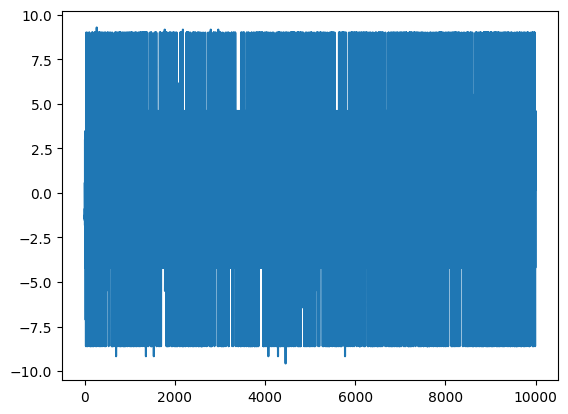

In [70]:
# test q-learning

env3x3 = GridWorld3x3Env()

avg_reward_per_episode, Q = Q_learning(env=env3x3, n_episodes=10000, mode=1)

plt.plot(np.arange(10000), avg_reward_per_episode)
plt.show()

In [66]:
n_s

array([1.1492e+04, 9.1800e+02, 5.1000e+01, 2.7547e+04, 6.5300e+02,
       1.9000e+01, 2.0659e+04, 1.0148e+04, 2.0000e+04])

In [67]:
n_s_a

array([[1.0581e+04, 6.0000e+01, 7.6300e+02, 8.8000e+01],
       [3.0000e+01, 7.5500e+02, 3.6000e+01, 9.7000e+01],
       [4.0000e+00, 4.0000e+01, 4.0000e+00, 3.0000e+00],
       [1.2829e+04, 1.3554e+04, 5.7500e+02, 5.8900e+02],
       [1.1000e+01, 6.1000e+02, 1.4000e+01, 1.8000e+01],
       [1.0000e+01, 0.0000e+00, 1.0000e+00, 8.0000e+00],
       [7.6020e+03, 1.7100e+02, 1.0084e+04, 2.8020e+03],
       [5.3000e+01, 5.7000e+01, 9.9900e+03, 4.8000e+01],
       [2.9000e+01, 9.7860e+03, 3.9000e+01, 1.4600e+02]])

## Double Q-learning

In [68]:
def Double_Q_learning():
    pass

In [69]:
# test environment
e = GridWorld3x3Env()
UP = 0
LEFT = 1
RIGHT = 2
DOWN = 3
GRID_WIDTH = 3


